## Sumbit example

In [535]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [536]:
# Add your code here
df = pd.read_csv("./train.csv")
df.head(20)   

,Unnamed: 0,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration
0,6622,ecom,6488536.0,NaN,0,82221,0,0,18.450527,0.461750,2020-04-21 16:04:41.817367072
1,2047,information_source,874840.0,21100.0,0,12872,0,0,10.721619,-0.022317,2024-07-19 23:50:07.268931816
2,1118,information_source,571210.0,94707.0,0,0,7420,0,1.922243,0.046396,2024-07-13 16:35:54.794883135
3,4992,news,89534.0,924.0,0,834,0,0,2.149243,-0.093360,2024-09-10 21:29:14.006315095
4,9970,information_source,1043953.0,289288.0,0,58375,20260,3948,3.764965,0.027303,2024-05-26 11:07:15.950527838
5,5505,ecom,3060369.0,0.0,1945683,51293,0,NaN,8.586621,0.640110,2022-07-25 16:59:56.675929416
6,4553,porn,99712.0,0.0,0,0,15178,3725,20.786928,0.063572,2023-04-26 05:40:15.012475568
7,1176,ecom,31677060.0,8760379.0,0,924098,0,8519,8.066347,0.080541,2024-02-19 13:16:17.401183524
8,9356,information_source,NaN,30903.0,0,11154,0,260,5.259169,0.283655,2022-01-21 16:24:14.483874704
9,9772,ecom,1695855.0,0.0,1601683,78271,0,1171,9.834370,0.757402,2023-07-10 23:20:54.166954000


In [537]:
df['date_of_registration'] = pd.to_datetime(df['date_of_registration'], errors='coerce')

In [538]:
df.columns.values[0] = 'unknown_feature'

In [539]:
df['source_attractiveness'].mean(), df['source_attractiveness'].median()

(np.float64(0.19199688460706613), np.float64(0.1542557099964202))

<Axes: >

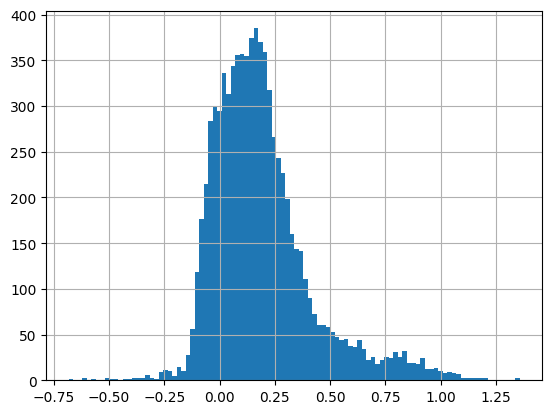

In [540]:
df['source_attractiveness'].hist(bins=100)

In [541]:
def print_shape(data):
    shape = data.shape
    print("Rows:", shape[0])
    print("Cols:", shape[1])

print_shape(df)

Rows: 8000
Cols: 11


In [542]:
train, test = train_test_split(df, test_size=0.2)

In [543]:
print_shape(train)
print_shape(test)

Rows: 6400
Cols: 11
Rows: 1600
Cols: 11


In [544]:
train['time_existence'] = (pd.Timestamp.now() - train['date_of_registration'])/pd.Timedelta(days=365)

In [545]:
train.head(20)

,unknown_feature,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration,time_existence
4943,7141,news,468594.0,0.0,0,42355,0,0,2.737049,-0.014978,2024-03-30 12:20:55.056389730,0.543393
1322,2867,news,NaN,47980.0,0,17456,0,NaN,5.380852,0.316226,2020-07-29 16:19:10.521028752,4.214172
1932,7350,information_source,601504.0,164524.0,0,34423,0,-,0.414602,0.142050,2023-08-28 11:25:55.295608188,1.132538
492,9677,porn,125462.0,8666.0,0,30516,0,956,4.512745,-0.037150,2024-05-11 16:44:11.594860226,0.427823
232,7903,ecom,1776281.0,790966.0,0,0,6428,45,31.266881,0.283034,2023-10-06 00:35:57.533773776,1.026926
5080,4280,ecom,20056325.0,11010021.0,11386548,456927,0,6368,0.678410,0.763225,2021-01-29 05:41:22.123021376,3.711276
6895,5051,social,2641709.0,670805.0,0,80316,0,-,127.167568,0.328809,2021-10-26 22:11:20.050458112,2.969667
4395,4422,information_source,2670783.0,0.0,0,295254,0,982,8.076661,0.188632,2022-07-14 17:58:43.496845760,2.255079
1884,5714,ecom,4647481.0,465160.0,1869992,30810,0,143,5.759620,0.344023,2024-06-17 18:09:23.797179636,0.326291
1213,8328,information_source,38325.0,0.0,0,3549,0,0,4.937035,0.150956,2022-05-08 19:34:18.614186144,2.438459


In [546]:
train['average_dwelltime'] = train['average_dwelltime'].apply(lambda x: np.nan if x < 0 else x)

In [547]:
train.replace('-', np.nan, inplace=True)
train['complaints_count'] = train['complaints_count'].astype(float)

In [548]:
train.head(20)

,unknown_feature,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration,time_existence
4943,7141,news,468594.0,0.0,0,42355,0,0.0,2.737049,-0.014978,2024-03-30 12:20:55.056389730,0.543393
1322,2867,news,NaN,47980.0,0,17456,0,NaN,5.380852,0.316226,2020-07-29 16:19:10.521028752,4.214172
1932,7350,information_source,601504.0,164524.0,0,34423,0,NaN,0.414602,0.142050,2023-08-28 11:25:55.295608188,1.132538
492,9677,porn,125462.0,8666.0,0,30516,0,956.0,4.512745,-0.037150,2024-05-11 16:44:11.594860226,0.427823
232,7903,ecom,1776281.0,790966.0,0,0,6428,45.0,31.266881,0.283034,2023-10-06 00:35:57.533773776,1.026926
5080,4280,ecom,20056325.0,11010021.0,11386548,456927,0,6368.0,0.678410,0.763225,2021-01-29 05:41:22.123021376,3.711276
6895,5051,social,2641709.0,670805.0,0,80316,0,NaN,127.167568,0.328809,2021-10-26 22:11:20.050458112,2.969667
4395,4422,information_source,2670783.0,0.0,0,295254,0,982.0,8.076661,0.188632,2022-07-14 17:58:43.496845760,2.255079
1884,5714,ecom,4647481.0,465160.0,1869992,30810,0,143.0,5.759620,0.344023,2024-06-17 18:09:23.797179636,0.326291
1213,8328,information_source,38325.0,0.0,0,3549,0,0.0,4.937035,0.150956,2022-05-08 19:34:18.614186144,2.438459


In [549]:
train.fillna(train.select_dtypes(include='number').mean(), inplace=True)

In [550]:
train.head(20)

,unknown_feature,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration,time_existence
4943,7141,news,4.685940e+05,0.0,0,42355,0,0.000000,2.737049,-0.014978,2024-03-30 12:20:55.056389730,0.543393
1322,2867,news,2.766675e+06,47980.0,0,17456,0,6292.113125,5.380852,0.316226,2020-07-29 16:19:10.521028752,4.214172
1932,7350,information_source,6.015040e+05,164524.0,0,34423,0,6292.113125,0.414602,0.142050,2023-08-28 11:25:55.295608188,1.132538
492,9677,porn,1.254620e+05,8666.0,0,30516,0,956.000000,4.512745,-0.037150,2024-05-11 16:44:11.594860226,0.427823
232,7903,ecom,1.776281e+06,790966.0,0,0,6428,45.000000,31.266881,0.283034,2023-10-06 00:35:57.533773776,1.026926
5080,4280,ecom,2.005632e+07,11010021.0,11386548,456927,0,6368.000000,0.678410,0.763225,2021-01-29 05:41:22.123021376,3.711276
6895,5051,social,2.641709e+06,670805.0,0,80316,0,6292.113125,127.167568,0.328809,2021-10-26 22:11:20.050458112,2.969667
4395,4422,information_source,2.670783e+06,0.0,0,295254,0,982.000000,8.076661,0.188632,2022-07-14 17:58:43.496845760,2.255079
1884,5714,ecom,4.647481e+06,465160.0,1869992,30810,0,143.000000,5.759620,0.344023,2024-06-17 18:09:23.797179636,0.326291
1213,8328,information_source,3.832500e+04,0.0,0,3549,0,0.000000,4.937035,0.150956,2022-05-08 19:34:18.614186144,2.438459


In [552]:
categorial_features = ['category'] # категориальные
real_features = ['unknown_feature','clicks', 'likes', 'buys','4xx_errors', '5xx_errors', 'complaints_count', 'average_dwelltime','time_existence'] # вещественные
target_features = 'source_attractiveness' # целевой

In [553]:
import warnings
warnings.filterwarnings('ignore')

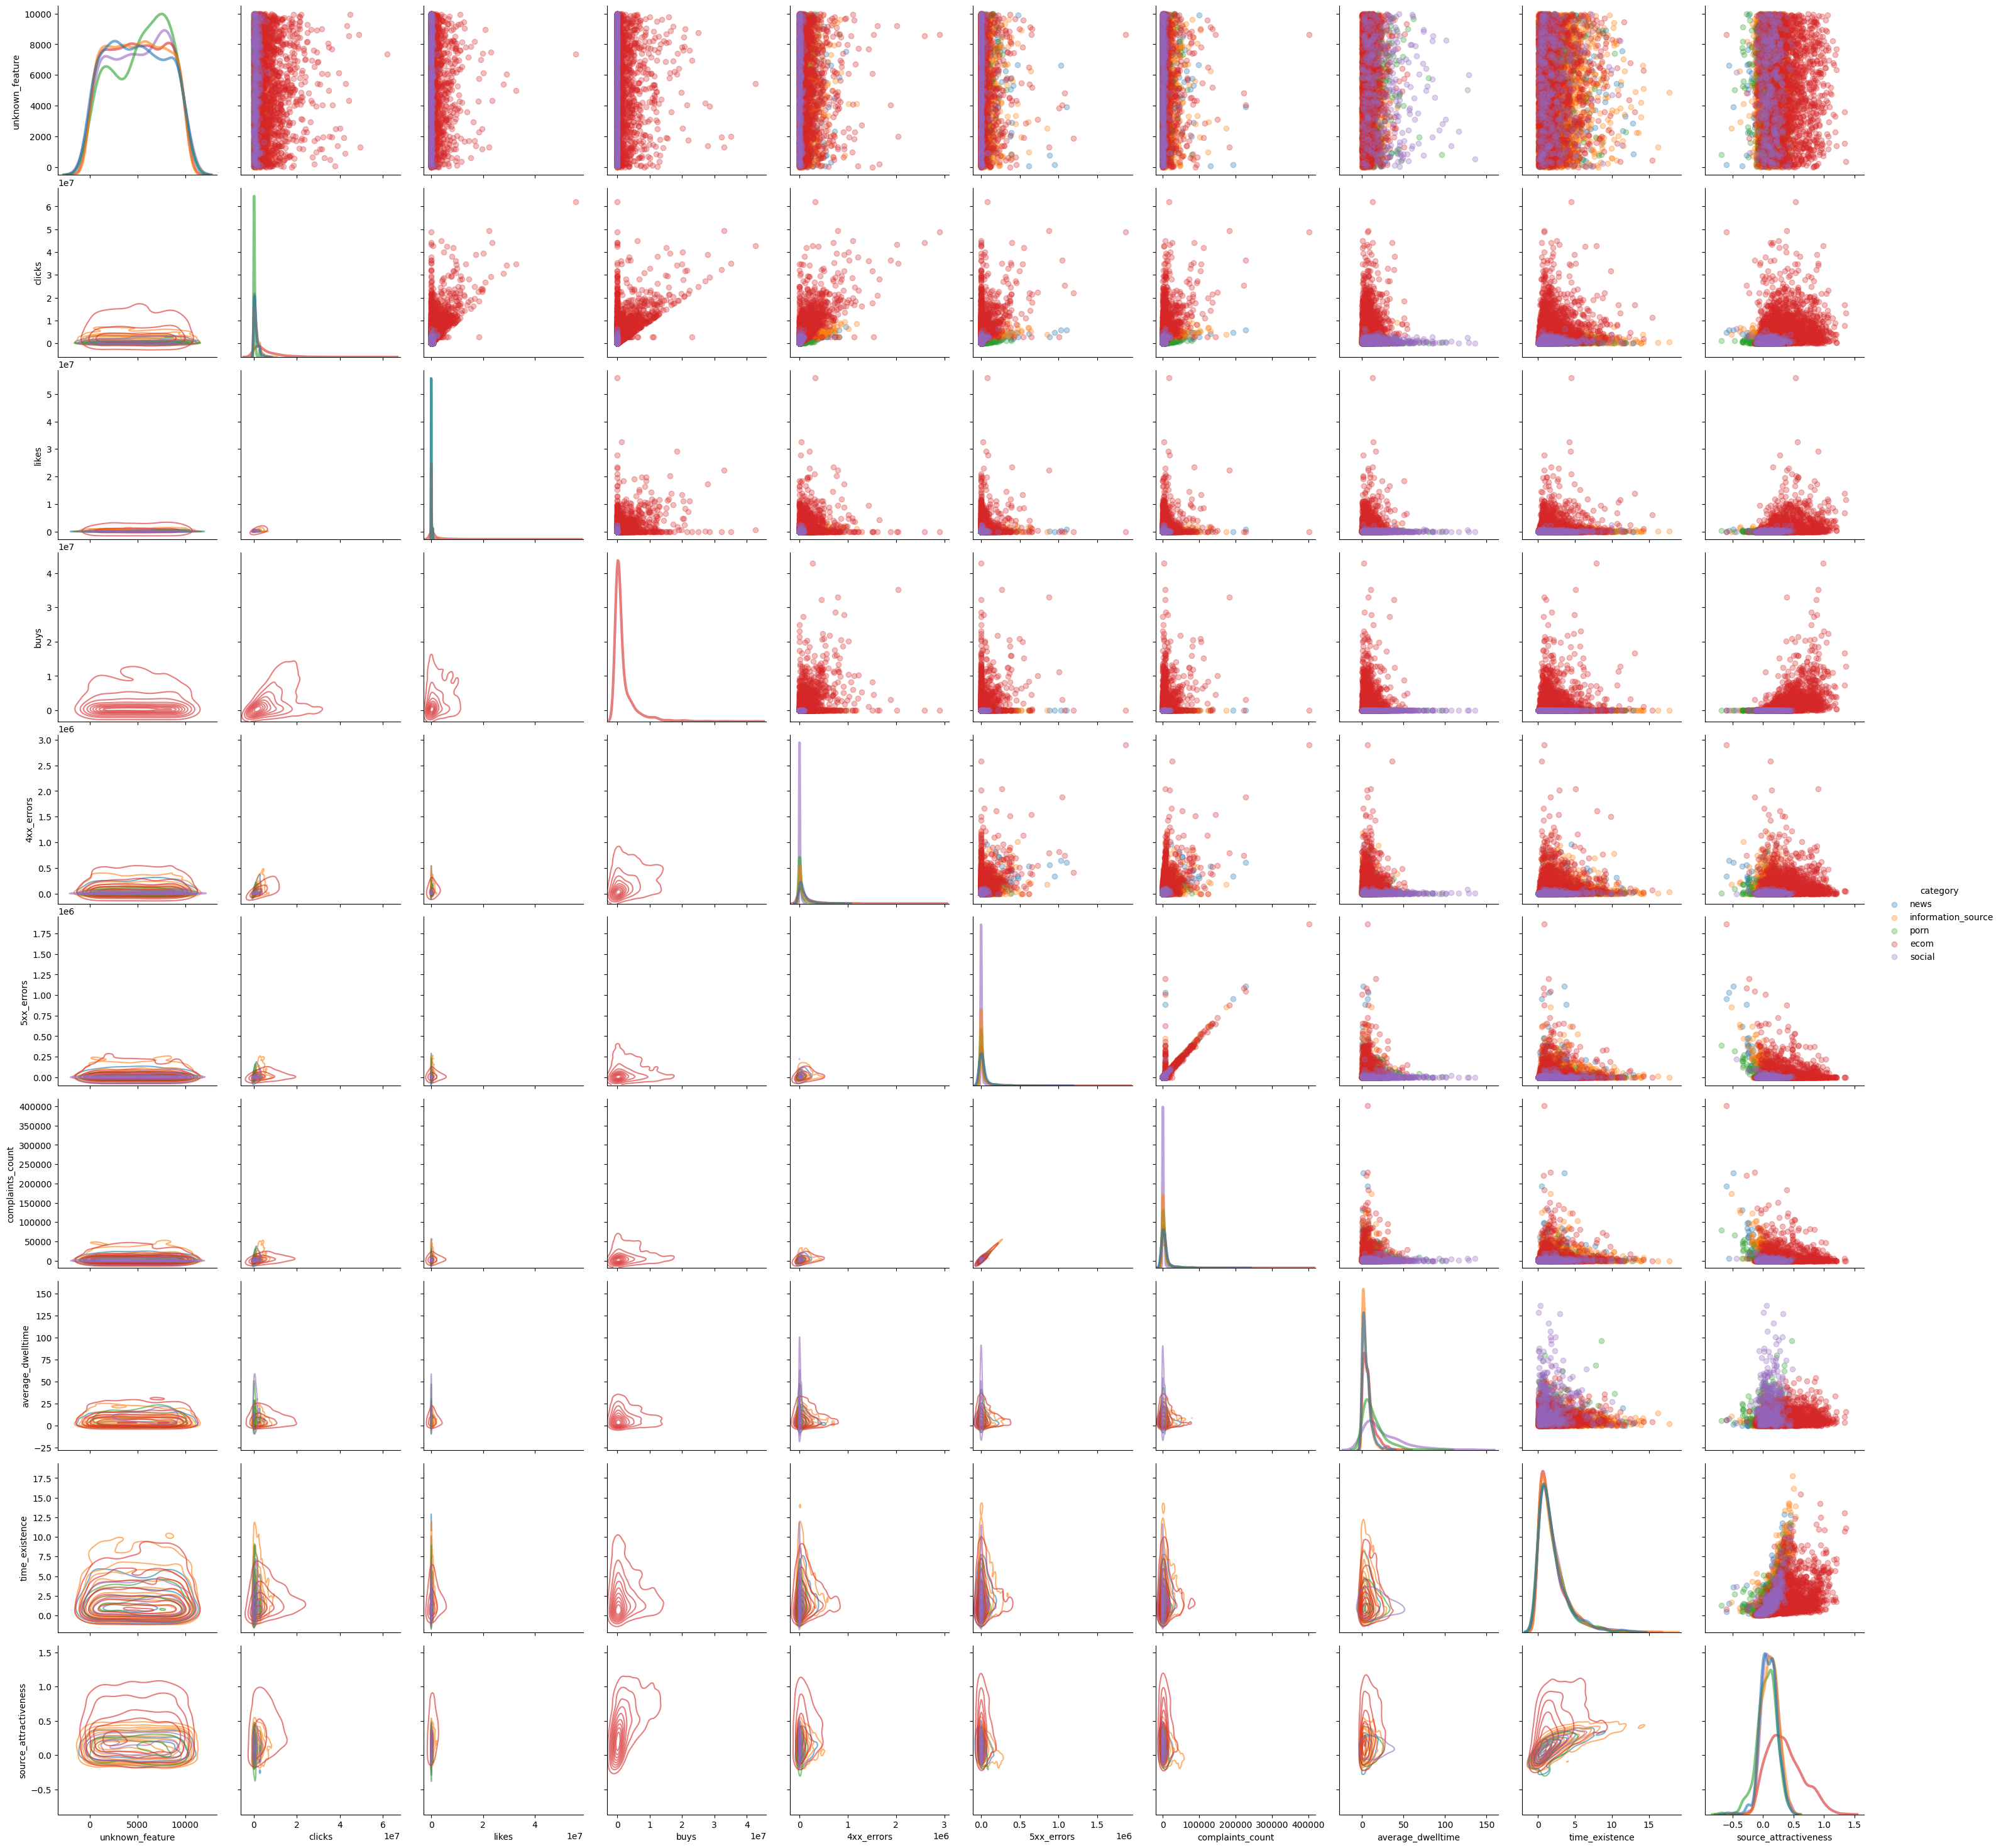

In [554]:
for hue in categorial_features:
    g = sns.PairGrid(train[[*(real_features + [target_features]), hue]], hue=hue, diag_sharey=False, height=3)
    g.map_lower(sns.kdeplot, alpha=0.6)
    g.map_upper(plt.scatter, alpha=0.3)
    g.map_diag(sns.kdeplot, lw=3, alpha=0.6, common_norm=False)
    g.add_legend()
    

In [555]:
encoder = OneHotEncoder(drop='first', sparse_output = False)
train_cat = encoder.fit_transform(train[categorial_features])
train_cat   

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [556]:
encoder.categories_

[array(['ecom', 'information_source', 'news', 'porn', 'social'],
       dtype=object)]

In [557]:
X_train = np.hstack([train[real_features], train_cat])
print_shape(X_train)

Rows: 6400
Cols: 13


In [558]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, train[target_features])

LinearRegression()

In [559]:
model.coef_

array([-6.19096061e-07, -1.47142081e-08,  2.24360247e-08,  4.61372582e-08,
        5.78957621e-08, -5.21610316e-07, -5.43407918e-08,  2.16840218e-03,
        5.22725738e-02, -1.96736457e-01, -2.24376248e-01, -2.79440900e-01,
       -2.51207319e-01])

In [560]:
model.intercept_

np.float64(0.22800009938462112)

In [561]:
test['time_existence'] = (pd.Timestamp.now() - test['date_of_registration'])/pd.Timedelta(days=365)
test['average_dwelltime'] = test['average_dwelltime'].apply(lambda x: np.nan if x < 0 else x)
test.replace('-', np.nan, inplace=True)
test['complaints_count'] = test['complaints_count'].astype(float)
test.fillna(test.select_dtypes(include='number').mean(), inplace=True)
test_cat = encoder.transform(test[categorial_features])
X_test = np.hstack([test[real_features], test_cat])

In [562]:
test_preds = model.predict(X_test)

In [563]:
MSE = ((test_preds - test[target_features]) ** 2).mean()
MSE

np.float64(0.017445229455138184)

## Final model submit function

Принимает на вход путь к набору данных в формате `.csv`

На выходе получается файл с предиктами в формате `.csv`

Пример содержания:
```
0.432
0.412
0.312
```

Реализация модели - между ними

In [564]:
def predict(data_path):
    data = pd.read_csv(data_path)
    data['date_of_registration'] = pd.to_datetime(data['date_of_registration'], errors='coerce')
    data.columns.values[0] = 'unknown_feature'
    data['time_existence'] = (pd.Timestamp.now() - data['date_of_registration'])/pd.Timedelta(days=365)
    data['average_dwelltime'] = data['average_dwelltime'].apply(lambda x: np.nan if x < 0 else x)
    data.replace('-', np.nan, inplace=True)
    data['complaints_count'] = data['complaints_count'].astype(float)
    data.fillna(data.select_dtypes(include='number').mean(), inplace=True)
    test_cat = encoder.transform(data[categorial_features])
    X_test = np.hstack([data[real_features], test_cat])
    predicts = model.predict(X_test)
    data = {"source_attractiveness": predicts}
    submit = pd.DataFrame(data)
    submit.to_csv('submission.csv', index_label="ID")


In [565]:
predict("./test.csv")